# Simulazione dell'Equazione del Calore

Questo notebook esplora l'effetto della diffusività termica $ \alpha $ e della lunghezza d'onda $ \lambda $ sull'evoluzione temporale del profilo di temperatura in un sistema unidimensionale. Utilizzeremo il modello dell'equazione del calore per eseguire sei simulazioni distinte: tre variando $ \alpha $ con $ \lambda $ fissato, e tre variando $ \lambda $ con $ \alpha $ fissato.

Lo scopo è dimostrare che il tempo di rilassamento $ \tau $ è legato alla diffusività termica $ \alpha $ dalla seguente relazione approssimata:
$$
\alpha \approx \frac{\lambda^2}{4\pi^2\tau}
$$



## Obiettivi delle Simulazioni

Le simulazioni sono progettate per:

1. **Variare $ \alpha $**: Eseguire simulazioni con $ \alpha = 0.5, 5, 50 $ $ \text{m}^2/\text{sec} $ mantenendo $ \lambda $ costante a $ L/4 $.
2. **Variare $ \lambda $**: Eseguire simulazioni con $ \lambda = L, L/2, L/4 $ mantenendo $ \alpha $ costante a 5 $ \text{m}^2/\text{sec} $.

Attraverso queste simulazioni, osserveremo come varia il tempo di rilassamento $ \tau $ in risposta ai cambiamenti in $ \alpha $ e $ \lambda $, e confermeremo la relazione teorica data.


## Dettagli Tecnici e Parametri delle Simulazioni

Le simulazioni utilizzano l'equazione del calore in forma discretizzata:
$$
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
$$
dove $ T $ rappresenta la temperatura, $ \alpha $ la diffusività termica, e $ x $ la posizione spaziale. 

- **Lunghezza del dominio** $ L $: 100.0 metri
- **Passo spaziale** $ dx $: 0.1 metri
- **Intervallo temporale** $ dt $: Calcolato per soddisfare la condizione di stabilità: $ dt \leq \frac{dx^2}{2\alpha} $

Questi parametri assicurano che le simulazioni siano stabili e accurate, fornendo risultati affidabili per l'analisi.


## Visualizzazione e Analisi dei Risultati

Per ciascuna simulazione, visualizzeremo il decadimento dell'ampiezza della temperatura nel tempo. Queste visualizzazioni ci aiuteranno a comprendere meglio l'effetto delle variazioni di $ \alpha $ e $ \lambda $ sul raffreddamento del sistema e confermare la relazione tra $ \tau $, $ \alpha $, e $ \lambda $ come previsto dalla teoria. Dalla cella seguente è possibile decommentare per l'esercizio 3a, 3b mentre il 3c è gia decommentato

Alpha: 0.5, Tau: 48.970000000000006 seconds
Alpha: 5, Tau: 4.897000000000001 seconds
Alpha: 50, Tau: 0.4897000000000001 seconds
Lambda: 100.0, Tau: None seconds
Lambda: 50.0, Tau: None seconds
Lambda: 25.0, Tau: 4.897000000000001 seconds


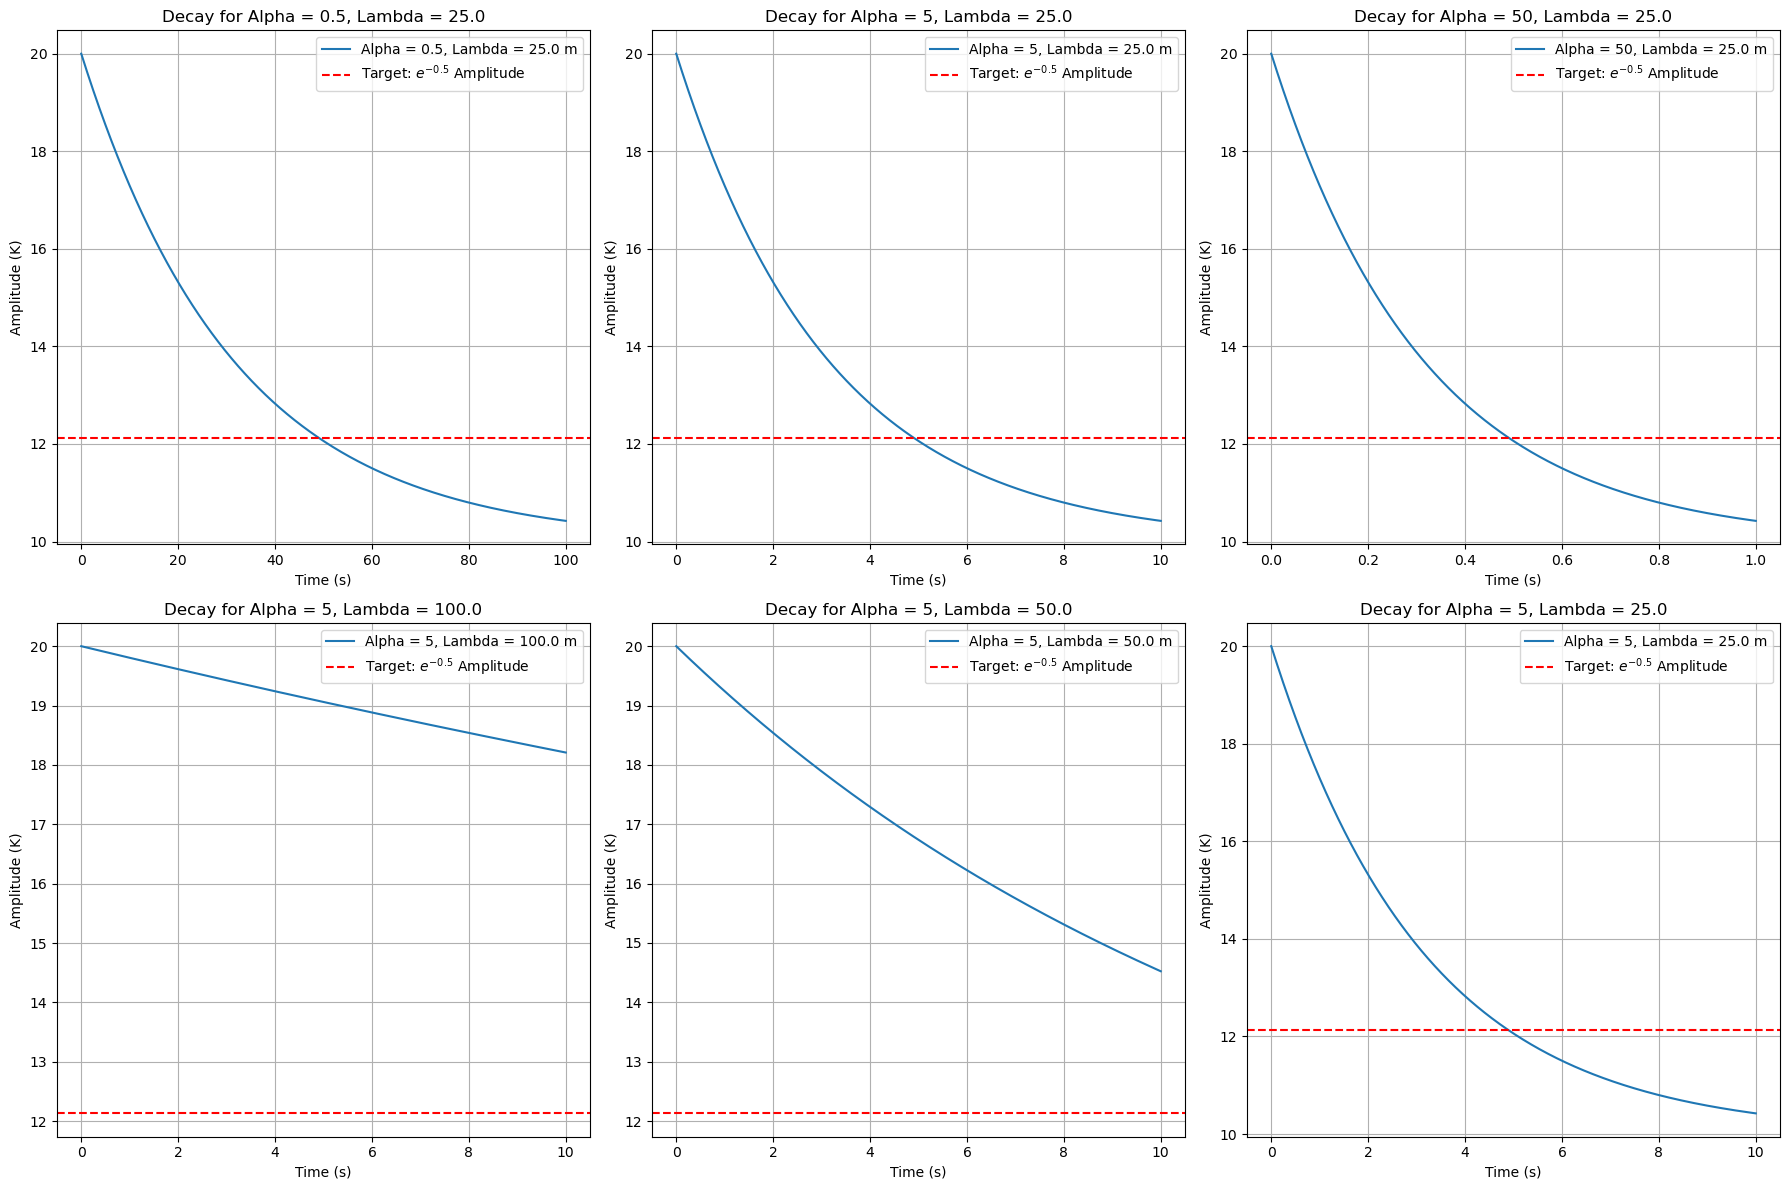

In [ ]:
# %%
############### 3a
# import numpy as np
# import matplotlib.pyplot as plt

# # Costanti e condizioni iniziali
# L = 100.0  # lunghezza del dominio in metri
# T0 = 500.0  # temperatura media in Kelvin
# A0 = 20.0  # ampiezza del profilo di temperatura in Kelvin
# lambda_wave = L / 4  # lunghezza d'onda del profilo di temperatura

# N = 100  # numero di punti spaziali
# h = L / (N - 1)  # dimensione del passo spaziale
# tau = 0.1  # passo temporale in secondi
# kappa = 0.1  # diffusività termica in m^2/s

# # Verifica della condizione di stabilità per il metodo FTCS
# assert tau <= h**2 / (2 * kappa), "Condizione di stabilità non soddisfatta!"

# # Numero di passi temporali da simulare
# time_steps = 2000

# # Profilo di temperatura iniziale
# x = np.linspace(0, L, N)
# T = T0 - A0 * np.cos(2 * np.pi * x / lambda_wave)

# # Preparazione alla simulazione
# T_new = np.copy(T)
# results = [np.copy(T)]

# # Simulazione con schema FTCS
# for _ in range(time_steps):
#     for i in range(1, N-1):
#         T_new[i] = T[i] + kappa * tau / h**2 * (T[i+1] - 2*T[i] + T[i-1])
#     # Condizioni al contorno di Neumann
#     T_new[0] = T_new[1]
#     T_new[-1] = T_new[-2]
#     T = np.copy(T_new)
#     results.append(np.copy(T))

# # Creazione del grafico dei risultati
# plt.figure(figsize=(10, 6))
# for i, temp_profile in enumerate(results[::200]):
#     plt.plot(x, temp_profile, label=f'Tempo = {i*200*tau:.1f} s')
# plt.title('Evoluzione Temporale del Profilo di Temperatura')
# plt.xlabel('Posizione (m)')
# plt.ylabel('Temperatura (K)')
# plt.legend()
# plt.show()

# %%
############### 3b
# import numpy as np
# import matplotlib.pyplot as plt

# # Parametri del modello
# L = 100.0  # lunghezza del dominio (m)
# N = 500    # numero di punti nel dominio spaziale
# x = np.linspace(0, L, N)
# dx = L / (N - 1)
# kappa = 0.1  # diffusività termica (m^2/s)
# dt = 0.01  # intervallo di tempo (s)
# lambda_wave = L / 4  # lunghezza d'onda del profilo di temperatura
# T0 = 500   # temperatura media (K)
# A0 = 20    # ampiezza iniziale (K)

# # Condizione iniziale
# T = T0 - A0 * np.cos(2 * np.pi * x / lambda_wave)

# # Tempo di simulazione e array per l'analisi dell'ampiezza
# time_steps = 1000
# amplitudes = []

# # Simulazione numerica usando il metodo FTCS
# for t in range(time_steps):
#     T_new = np.copy(T)
#     for i in range(1, N-1):
#         T_new[i] = T[i] + kappa * dt / dx**2 * (T[i-1] - 2*T[i] + T[i+1])
    
#     # Condizioni al contorno di Neumann
#     T_new[0] = T_new[1]
#     T_new[-1] = T_new[-2]
    
#     T = np.copy(T_new)
    
#     # Calcolo dell'ampiezza attuale
#     if t % 50 == 0:  # Estrarre l'ampiezza ogni 50 passi temporali
#         current_amplitude = (np.max(T) - np.min(T)) / 2
#         amplitudes.append(current_amplitude)

# # Calcolo della teoria dell'ampiezza decadimento esponenziale
# times = np.arange(0, time_steps, 50) * dt
# tau = lambda_wave**2 / (4 * np.pi**2 * kappa)
# theoretical_amplitudes = A0 * np.exp(-times / tau)

# # Grafico dei risultati
# plt.figure(figsize=(10, 6))
# plt.plot(times, amplitudes, 'bo-', label='Ampiezza Simulata')
# plt.plot(times, theoretical_amplitudes, 'r--', label='Ampiezza Teorica $A_0 e^{-t/\\tau}$')
# plt.title('Decadimento dell\'ampiezza del profilo di temperatura')
# plt.xlabel('Tempo (s)')
# plt.ylabel('Ampiezza (K)')
# plt.legend()
# plt.grid(True)
# plt.show()
# %%
############### 3c
import numpy as np
import matplotlib.pyplot as plt

def heat_equation_simulation(L, alpha, lambda_wave, dx, A0=20, T0=500):
    N = int(L / dx) + 1
    x = np.linspace(0, L, N)
    T = T0 - A0 * np.cos(2 * np.pi * x / lambda_wave)
    kappa = alpha

    dt = (dx**2) / (2 * kappa)  # Condizione di stabilità
    time_steps = 10000  # Numero elevato di passi temporali
    amplitudes = []

    for _ in range(time_steps):
        T_new = np.copy(T)
        for i in range(1, N-1):
            T_new[i] = T[i] + kappa * dt / dx**2 * (T[i-1] - 2*T[i] + T[i+1])
        T = np.copy(T_new)
        current_amplitude = (np.max(T) - np.min(T)) / 2
        amplitudes.append(current_amplitude)
    
    return amplitudes, dt

def compute_tau(amplitudes, dt, reduction_factor=1):
    initial_amplitude = amplitudes[0]
    target_amplitude = initial_amplitude / np.exp(reduction_factor)
    for i, amplitude in enumerate(amplitudes):
        if amplitude < target_amplitude:
            return i * dt
    return None

def plot_amplitude_decay(fig, ax, amplitudes, dt, alpha, lambda_wave, index, reduction_factor=1):
    times = np.linspace(0, len(amplitudes) * dt, len(amplitudes))
    ax.plot(times, amplitudes, label=f'Alpha = {alpha}, Lambda = {lambda_wave} m')
    ax.axhline(y=amplitudes[0] / np.exp(reduction_factor), color='r', linestyle='--', label=f'Target: $e^{{-{reduction_factor}}}$ Amplitude')
    ax.set_title(f'Decay for Alpha = {alpha}, Lambda = {lambda_wave}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (K)')
    ax.legend()
    ax.grid(True)

# Parametri
L = 100.0
dx = 0.1
reduction_factor = 0.5

# Setup della figura e degli assi
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()

# Simulazioni con alpha variabile e lambda fissato
lambda_wave = L / 4
alphas = [0.5, 5, 50]
for i, alpha in enumerate(alphas):
    amplitudes, dt = heat_equation_simulation(L, alpha, lambda_wave, dx)
    tau = compute_tau(amplitudes, dt, reduction_factor)
    print(f'Alpha: {alpha}, Tau: {tau} seconds')
    plot_amplitude_decay(fig, axs[i], amplitudes, dt, alpha, lambda_wave, i, reduction_factor)

# Simulazioni con lambda variabile e alpha fissato
alpha_fixed = 5
lambdas = [L, L / 2, L / 4]
for i, lambda_wave in enumerate(lambdas):
    amplitudes, dt = heat_equation_simulation(L, alpha_fixed, lambda_wave, dx)
    tau = compute_tau(amplitudes, dt, reduction_factor)
    print(f'Lambda: {lambda_wave}, Tau: {tau} seconds')
    plot_amplitude_decay(fig, axs[i + 3], amplitudes, dt, alpha_fixed, lambda_wave, i + 3, reduction_factor)

fig.tight_layout()
plt.show()
